In [1]:
import os
path = r'E:\repo\ml_bt'
all_path = [os.path.join(path,x) for x in os.listdir(path) if 'MA' in x]
all_path

['E:\\repo\\ml_bt\\MA1801.csv',
 'E:\\repo\\ml_bt\\MA1805.csv',
 'E:\\repo\\ml_bt\\MA1809.csv',
 'E:\\repo\\ml_bt\\MA1901.csv',
 'E:\\repo\\ml_bt\\MA1905.csv',
 'E:\\repo\\ml_bt\\MA1909.csv',
 'E:\\repo\\ml_bt\\MA2001.csv',
 'E:\\repo\\ml_bt\\MA2005.csv',
 'E:\\repo\\ml_bt\\MA2009.csv',
 'E:\\repo\\ml_bt\\MA2101.csv',
 'E:\\repo\\ml_bt\\MA2105.csv',
 'E:\\repo\\ml_bt\\MA2109.csv',
 'E:\\repo\\ml_bt\\MA2201.csv']

In [2]:
# 将全部的数据存入字典
import pandas as pd 
start_end_dic = {}
for e in all_path:
    data = pd.read_csv(e,index_col=0)
    grag_volume= data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['volume','50%']
    grag_open_interest = data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['open_interest','40%']
    grag_open_interest2 = data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['open_interest','50%']
#     print(e,grag_volume,grag_open_interest,grag_open_interest2)
    data1 = data.copy()
    for i in data1.index:
        if data1.loc[i,'open_interest']>30000:
            start1 = i
            break
    for i in data1.index[::-1]:
        if 'MA2201' in e:
            end1 = len(data1)
            break
        if data1.loc[i,'open_interest']<60000 and data1.loc[i-1,'open_interest']>60000:
            end1 = i
            break
    print(start1,end1)
    data2 = data1.iloc[start1:end1,:]
    start_end_dic[e] = (start1,end1,data)

5147 17185
5180 17024
4182 16912
3897 17061
4761 17383
4316 17177
2809 17211
2843 15334
3855 14600
2472 14080
4559 15625
5120 15653
2731 14577


### **准备数据**

In [3]:
start = start_end_dic[all_path[-1]][0]
end = start_end_dic[all_path[-1]][1]
data = start_end_dic[all_path[-1]][2]

In [4]:
start,end

(2731, 14577)

In [5]:
data.iloc[start:end,:]

,date,open,high,low,close,volume,money,open_interest
2731,2021-03-19 14:40:00,2393.0,2397.0,2387.0,2394.0,340.0,8203990.0,30030.0
2732,2021-03-19 14:45:00,2391.0,2395.0,2390.0,2390.0,108.0,2541030.0,30117.0
2733,2021-03-19 14:50:00,2393.0,2393.0,2388.0,2393.0,167.0,3976700.0,30134.0
2734,2021-03-19 14:55:00,2390.0,2390.0,2388.0,2389.0,18.0,438660.0,30130.0
2735,2021-03-19 15:00:00,2391.0,2391.0,2378.0,2378.0,71.0,1730270.0,30129.0
...,...,...,...,...,...,...,...,...
14572,2021-12-03 22:40:00,2696.0,2705.0,2696.0,2704.0,13391.0,361977950.0,569744.0
14573,2021-12-03 22:45:00,2704.0,2707.0,2696.0,2698.0,13364.0,361524600.0,568361.0
14574,2021-12-03 22:50:00,2699.0,2702.0,2695.0,2699.0,10490.0,280187900.0,565956.0
14575,2021-12-03 22:55:00,2698.0,2701.0,2694.0,2696.0,10695.0,290581100.0,562881.0


### **计算收益或收益率**

In [6]:
data['close_shift(-5)'] = data['close'].shift(-5)
# data['return'] =0.5 + 0.5*np.sign(data_cleaned['Close0_shift(-1)']-data_cleaned['Close0'])
data['return'] = data['close_shift(-5)']-data['close']
data.head(20)

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return
0,2021-01-15 21:05:00,2338.0,2338.0,2309.0,2309.0,1.0,23090.0,1.0,2322.0,13.0
1,2021-01-15 21:10:00,2309.0,2397.0,2309.0,2315.0,2.0,47110.0,2.0,2344.0,29.0
2,2021-01-15 21:15:00,2315.0,2322.0,2315.0,2322.0,1.0,23240.0,3.0,2350.0,28.0
3,2021-01-15 21:20:00,2322.0,2334.0,2322.0,2322.0,2.0,46540.0,5.0,2350.0,28.0
4,2021-01-15 21:25:00,2322.0,2322.0,2322.0,2322.0,0.0,0.0,5.0,2333.0,11.0
5,2021-01-15 21:30:00,2322.0,2322.0,2322.0,2322.0,0.0,0.0,5.0,2333.0,11.0
6,2021-01-15 21:35:00,2322.0,2344.0,2322.0,2344.0,1.0,23470.0,6.0,2333.0,-11.0
7,2021-01-15 21:40:00,2344.0,2350.0,2344.0,2350.0,1.0,23510.0,7.0,2333.0,-17.0
8,2021-01-15 21:45:00,2350.0,2350.0,2350.0,2350.0,0.0,0.0,7.0,2325.0,-25.0
9,2021-01-15 21:50:00,2350.0,2350.0,2333.0,2333.0,1.0,23280.0,8.0,2325.0,-8.0


In [7]:
# 查看收益的分布
data.iloc[start:end,:].describe().T

,count,mean,std,min,25%,50%,75%,max
open,11846.0,2.781401e+03,3.303375e+02,2360.0,2578.00,2707.0,2.836000e+03,4.226000e+03
high,11846.0,2.786526e+03,3.328317e+02,2361.0,2581.25,2711.0,2.842000e+03,4.235000e+03
low,11846.0,2.776281e+03,3.276150e+02,2359.0,2574.00,2703.0,2.831000e+03,4.202000e+03
close,11846.0,2.781407e+03,3.303013e+02,2360.0,2578.00,2707.0,2.836750e+03,4.226000e+03
volume,11846.0,1.326798e+04,2.170503e+04,0.0,230.00,1403.5,1.996400e+04,3.330330e+05
money,11846.0,4.083838e+08,6.985068e+08,0.0,6026455.00,38078605.0,5.826546e+08,9.619373e+09
open_interest,11846.0,4.882216e+05,4.480970e+05,27367.0,93960.75,178741.5,9.744868e+05,1.327589e+06
close_shift(-5),11841.0,2.781573e+03,3.302724e+02,2360.0,2578.00,2707.0,2.837000e+03,4.226000e+03
return,11841.0,1.318301e-01,2.064746e+01,-310.0,-7.00,0.0,8.000000e+00,2.200000e+02


<AxesSubplot:ylabel='Density'>

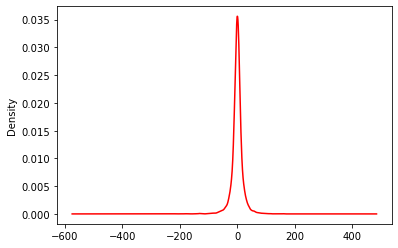

In [8]:
# 收益的概率分布图
data.iloc[start:end,:]['return'].plot(kind='kde',color='r')

<AxesSubplot:>

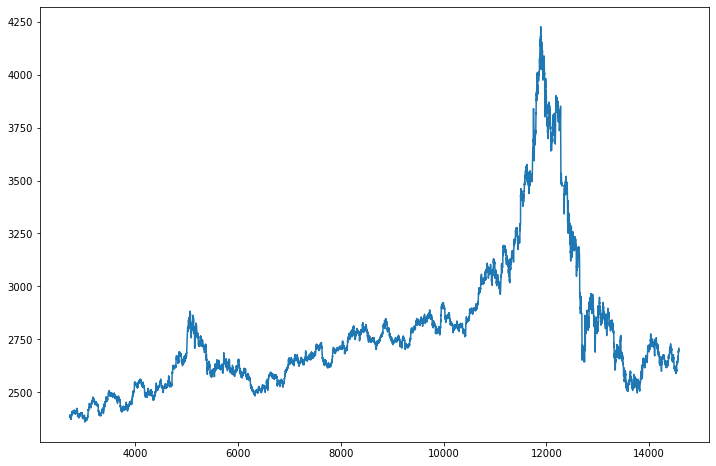

In [9]:
data.iloc[start:end,:]['close'].plot(figsize=(12,8))

In [10]:
# 处理标签
data.loc[:,'label'] = 0
data.loc[data['return']>=4,'label'] = 1
data.loc[data['return']<=-4,'label'] = -1
data

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,label
0,2021-01-15 21:05:00,2338.0,2338.0,2309.0,2309.0,1.0,23090.0,1.0,2322.0,13.0,1
1,2021-01-15 21:10:00,2309.0,2397.0,2309.0,2315.0,2.0,47110.0,2.0,2344.0,29.0,1
2,2021-01-15 21:15:00,2315.0,2322.0,2315.0,2322.0,1.0,23240.0,3.0,2350.0,28.0,1
3,2021-01-15 21:20:00,2322.0,2334.0,2322.0,2322.0,2.0,46540.0,5.0,2350.0,28.0,1
4,2021-01-15 21:25:00,2322.0,2322.0,2322.0,2322.0,0.0,0.0,5.0,2333.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...
14572,2021-12-03 22:40:00,2696.0,2705.0,2696.0,2704.0,13391.0,361977950.0,569744.0,NaN,NaN,0
14573,2021-12-03 22:45:00,2704.0,2707.0,2696.0,2698.0,13364.0,361524600.0,568361.0,NaN,NaN,0
14574,2021-12-03 22:50:00,2699.0,2702.0,2695.0,2699.0,10490.0,280187900.0,565956.0,NaN,NaN,0
14575,2021-12-03 22:55:00,2698.0,2701.0,2694.0,2696.0,10695.0,290581100.0,562881.0,NaN,NaN,0


In [32]:
# 构建因子
from CreateFeatures import * 
import copy
data1 = copy.deepcopy(data)
data1

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,label
0,2021-01-15 21:05:00,2338.0,2338.0,2309.0,2309.0,1.0,23090.0,1.0,2322.0,13.0,1
1,2021-01-15 21:10:00,2309.0,2397.0,2309.0,2315.0,2.0,47110.0,2.0,2344.0,29.0,1
2,2021-01-15 21:15:00,2315.0,2322.0,2315.0,2322.0,1.0,23240.0,3.0,2350.0,28.0,1
3,2021-01-15 21:20:00,2322.0,2334.0,2322.0,2322.0,2.0,46540.0,5.0,2350.0,28.0,1
4,2021-01-15 21:25:00,2322.0,2322.0,2322.0,2322.0,0.0,0.0,5.0,2333.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...
14572,2021-12-03 22:40:00,2696.0,2705.0,2696.0,2704.0,13391.0,361977950.0,569744.0,NaN,NaN,0
14573,2021-12-03 22:45:00,2704.0,2707.0,2696.0,2698.0,13364.0,361524600.0,568361.0,NaN,NaN,0
14574,2021-12-03 22:50:00,2699.0,2702.0,2695.0,2699.0,10490.0,280187900.0,565956.0,NaN,NaN,0
14575,2021-12-03 22:55:00,2698.0,2701.0,2694.0,2696.0,10695.0,290581100.0,562881.0,NaN,NaN,0


In [33]:
data1 = feature1(data1,13)
data1 = feature1(data1,21)
data1 = feature1(data1,34)
data1 = feature1(data1,55)
data1 = feature1(data1,89)
data1 = feature1(data1,144)
data1 = feature1(data1,233)

data1 = feature2(data1)

data1 = feature3(data1,3)
data1 = feature3(data1,5)
data1 = feature3(data1,8)
data1 = feature3(data1,13)
data1 = feature3(data1,21)
data1 = feature3(data1,34)
data1 = feature3(data1,55)

data1 = feature4(data1,'date')

data1 = feature5(data1,8)
data1 = feature5(data1,13)
data1 = feature5(data1,21)
data1 = feature5(data1,34)
data1 = feature5(data1,55)
data1 = feature5(data1,89)

data1 = feature6(data1,8)
data1 = feature6(data1,13)
data1 = feature6(data1,21)
data1 = feature6(data1,34)
data1 = feature6(data1,55)
data1 = feature6(data1,89)

In [34]:
data1.iloc[:,25:]

,feature3_55,feature4,feature5_8,feature5_13,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,0.038004,5,0.973417,0.951034,0.945538,0.883116,0.874157,0.659103,0.469155,0.230323,0.137017,0.055279,0.032710,0.009847
14573,0.035303,5,0.955779,0.943460,0.942103,0.841694,0.858315,0.628947,0.376377,0.213869,0.132605,0.045800,0.030399,0.009089
14574,0.041683,5,0.948683,0.951034,0.919145,0.883116,0.891102,0.682025,0.351123,0.230323,0.110432,0.055279,0.035680,0.010478
14575,0.038121,5,0.124035,0.957211,0.894427,0.873481,0.874157,0.659103,0.015623,0.246581,0.094809,0.052695,0.032710,0.009847


In [35]:
data1 = data1.iloc[start:end,:]
data1

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
2731,2021-03-19 14:40:00,2393.0,2397.0,2387.0,2394.0,340.0,8203990.0,30030.0,2383.0,-11.0,...,-0.526355,-0.621882,-0.641555,-0.711046,0.077888,-0.035481,-0.029466,-0.023350,-0.015205,-0.011361
2732,2021-03-19 14:45:00,2391.0,2395.0,2390.0,2390.0,108.0,2541030.0,30117.0,2385.0,-5.0,...,-0.464007,-0.648947,-0.737154,-0.690669,0.031235,-0.029573,-0.024936,-0.025079,-0.019831,-0.010730
2733,2021-03-19 14:50:00,2393.0,2393.0,2388.0,2393.0,167.0,3976700.0,30134.0,2392.0,-1.0,...,-0.496139,-0.592390,-0.731467,-0.677593,0.108727,-0.023662,-0.027201,-0.021621,-0.019500,-0.010352
2734,2021-03-19 14:55:00,2390.0,2390.0,2388.0,2389.0,18.0,438660.0,30130.0,2385.0,-4.0,...,-0.606043,-0.717279,-0.742688,-0.673086,0.124035,-0.011833,-0.036257,-0.030263,-0.020161,-0.010225
2735,2021-03-19 15:00:00,2391.0,2391.0,2378.0,2378.0,71.0,1730270.0,30129.0,2380.0,2.0,...,-0.836048,-0.816024,-0.798685,-0.740282,0.124035,-0.082557,-0.072372,-0.041487,-0.024125,-0.012371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,2021-12-03 22:40:00,2696.0,2705.0,2696.0,2704.0,13391.0,361977950.0,569744.0,NaN,NaN,...,0.945538,0.883116,0.874157,0.659103,0.469155,0.230323,0.137017,0.055279,0.032710,0.009847
14573,2021-12-03 22:45:00,2704.0,2707.0,2696.0,2698.0,13364.0,361524600.0,568361.0,NaN,NaN,...,0.942103,0.841694,0.858315,0.628947,0.376377,0.213869,0.132605,0.045800,0.030399,0.009089
14574,2021-12-03 22:50:00,2699.0,2702.0,2695.0,2699.0,10490.0,280187900.0,565956.0,NaN,NaN,...,0.919145,0.883116,0.891102,0.682025,0.351123,0.230323,0.110432,0.055279,0.035680,0.010478
14575,2021-12-03 22:55:00,2698.0,2701.0,2694.0,2696.0,10695.0,290581100.0,562881.0,NaN,NaN,...,0.894427,0.873481,0.874157,0.659103,0.015623,0.246581,0.094809,0.052695,0.032710,0.009847


In [36]:
data1 = data1.reset_index(drop=True)
data1

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,2021-03-19 14:40:00,2393.0,2397.0,2387.0,2394.0,340.0,8203990.0,30030.0,2383.0,-11.0,...,-0.526355,-0.621882,-0.641555,-0.711046,0.077888,-0.035481,-0.029466,-0.023350,-0.015205,-0.011361
1,2021-03-19 14:45:00,2391.0,2395.0,2390.0,2390.0,108.0,2541030.0,30117.0,2385.0,-5.0,...,-0.464007,-0.648947,-0.737154,-0.690669,0.031235,-0.029573,-0.024936,-0.025079,-0.019831,-0.010730
2,2021-03-19 14:50:00,2393.0,2393.0,2388.0,2393.0,167.0,3976700.0,30134.0,2392.0,-1.0,...,-0.496139,-0.592390,-0.731467,-0.677593,0.108727,-0.023662,-0.027201,-0.021621,-0.019500,-0.010352
3,2021-03-19 14:55:00,2390.0,2390.0,2388.0,2389.0,18.0,438660.0,30130.0,2385.0,-4.0,...,-0.606043,-0.717279,-0.742688,-0.673086,0.124035,-0.011833,-0.036257,-0.030263,-0.020161,-0.010225
4,2021-03-19 15:00:00,2391.0,2391.0,2378.0,2378.0,71.0,1730270.0,30129.0,2380.0,2.0,...,-0.836048,-0.816024,-0.798685,-0.740282,0.124035,-0.082557,-0.072372,-0.041487,-0.024125,-0.012371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11841,2021-12-03 22:40:00,2696.0,2705.0,2696.0,2704.0,13391.0,361977950.0,569744.0,NaN,NaN,...,0.945538,0.883116,0.874157,0.659103,0.469155,0.230323,0.137017,0.055279,0.032710,0.009847
11842,2021-12-03 22:45:00,2704.0,2707.0,2696.0,2698.0,13364.0,361524600.0,568361.0,NaN,NaN,...,0.942103,0.841694,0.858315,0.628947,0.376377,0.213869,0.132605,0.045800,0.030399,0.009089
11843,2021-12-03 22:50:00,2699.0,2702.0,2695.0,2699.0,10490.0,280187900.0,565956.0,NaN,NaN,...,0.919145,0.883116,0.891102,0.682025,0.351123,0.230323,0.110432,0.055279,0.035680,0.010478
11844,2021-12-03 22:55:00,2698.0,2701.0,2694.0,2696.0,10695.0,290581100.0,562881.0,NaN,NaN,...,0.894427,0.873481,0.874157,0.659103,0.015623,0.246581,0.094809,0.052695,0.032710,0.009847


In [37]:
# 截取因子
col_list = [x for x in list(data1.columns) if 'feature' in x]
col_list

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature2',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature4',
 'feature5_8',
 'feature5_13',
 'feature5_21',
 'feature5_34',
 'feature5_55',
 'feature5_89',
 'feature6_8',
 'feature6_13',
 'feature6_21',
 'feature6_34',
 'feature6_55',
 'feature6_89']

In [38]:
# 特征矩阵
X = data1[col_list]
X

,feature1_13,feature1_21,feature1_34,feature1_55,feature1_89,feature1_144,feature1_233,feature2,feature3_3,feature3_5,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.172609,0.006305,0.005460,...,-0.526355,-0.621882,-0.641555,-0.711046,0.077888,-0.035481,-0.029466,-0.023350,-0.015205,-0.011361
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194243,-0.002504,0.008439,...,-0.464007,-0.648947,-0.737154,-0.690669,0.031235,-0.029573,-0.024936,-0.025079,-0.019831,-0.010730
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.238371,0.000000,0.005885,...,-0.496139,-0.592390,-0.731467,-0.677593,0.108727,-0.023662,-0.027201,-0.021621,-0.019500,-0.010352
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.235293,-0.002089,-0.002922,...,-0.606043,-0.717279,-0.742688,-0.673086,0.124035,-0.011833,-0.036257,-0.030263,-0.020161,-0.010225
4,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.128779,-0.005021,-0.006268,...,-0.836048,-0.816024,-0.798685,-0.740282,0.124035,-0.082557,-0.072372,-0.041487,-0.024125,-0.012371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204534,0.005204,0.003340,...,0.945538,0.883116,0.874157,0.659103,0.469155,0.230323,0.137017,0.055279,0.032710,0.009847
11842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155818,-0.000371,0.003720,...,0.942103,0.841694,0.858315,0.628947,0.376377,0.213869,0.132605,0.045800,0.030399,0.009089
11843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114443,0.001113,0.003346,...,0.919145,0.883116,0.891102,0.682025,0.351123,0.230323,0.110432,0.055279,0.035680,0.010478
11844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061189,-0.002959,-0.001112,...,0.894427,0.873481,0.874157,0.659103,0.015623,0.246581,0.094809,0.052695,0.032710,0.009847


In [39]:
# 标签
Y = data1['label']
Y

0       -1
1       -1
2        0
3       -1
4        0
        ..
11841    0
11842    0
11843    0
11844    0
11845    0
Name: label, Length: 11846, dtype: int64

In [40]:
# 特征矩阵缺失值情况
X.isnull().mean()

feature1_13     0.0
feature1_21     0.0
feature1_34     0.0
feature1_55     0.0
feature1_89     0.0
feature1_144    0.0
feature1_233    0.0
feature2        0.0
feature3_3      0.0
feature3_5      0.0
feature3_8      0.0
feature3_13     0.0
feature3_21     0.0
feature3_34     0.0
feature3_55     0.0
feature4        0.0
feature5_8      0.0
feature5_13     0.0
feature5_21     0.0
feature5_34     0.0
feature5_55     0.0
feature5_89     0.0
feature6_8      0.0
feature6_13     0.0
feature6_21     0.0
feature6_34     0.0
feature6_55     0.0
feature6_89     0.0
dtype: float64

In [41]:
# 标签的缺失值情况
Y.isnull().sum()

0

In [42]:
# #是否有样本不平衡问题？ 有轻微的样本不均衡问题
Y.value_counts()

 1    4565
-1    4220
 0    3061
Name: label, dtype: int64

In [43]:
#描述性统计
X.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,11846.0,-0.006078,0.410249,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,11846.0,-0.003630,0.350943,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,11846.0,-0.002617,0.307074,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,11846.0,0.001266,0.265504,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,11846.0,-0.000844,0.240653,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,11846.0,0.000591,0.211329,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,11846.0,0.000338,0.173363,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,11846.0,-0.862585,122.106529,-9453.496140,-10.738097,-1.927668,-0.940985,-0.303837,-0.000178,0.320220,0.943683,9.035644,4831.209515
feature3_3,11846.0,0.000044,0.005170,-0.076602,-0.014521,-0.007178,-0.004729,-0.002087,0.000000,0.002233,0.004965,0.014100,0.074689
feature3_5,11846.0,0.000075,0.006693,-0.080519,-0.018669,-0.009414,-0.006273,-0.002648,0.000000,0.002847,0.006382,0.017810,0.083207


In [44]:
# 找出分类型特征
classf = [x for x in list(X.columns) if 'feature1' in x or 'feature4' in x]
classf

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature4']

In [45]:
# 找出连续型特征
col = X.columns.tolist()
for i in classf:
    col.remove(i)
col

['feature2',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature5_8',
 'feature5_13',
 'feature5_21',
 'feature5_34',
 'feature5_55',
 'feature5_89',
 'feature6_8',
 'feature6_13',
 'feature6_21',
 'feature6_34',
 'feature6_55',
 'feature6_89']

In [58]:
import joblib
ss = joblib.load("./ss.pkl")

In [60]:
X.loc[:,col] = ss.transform(X.loc[:,col])

E:\anaconda3\envs\ml_bt\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [48]:
X.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,11846.0,-0.006078,0.410249,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,11846.0,-0.003630,0.350943,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,11846.0,-0.002617,0.307074,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,11846.0,0.001266,0.265504,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,11846.0,-0.000844,0.240653,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,11846.0,0.000591,0.211329,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,11846.0,0.000338,0.173363,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,11846.0,-0.093013,9.927813,-768.634890,-0.895937,-0.179609,-0.099387,-0.047584,-0.022895,0.003155,0.053845,0.711758,392.776312
feature3_3,11846.0,-0.000041,1.478636,-21.921427,-4.165881,-2.065689,-1.365159,-0.609598,-0.012754,0.625775,1.407143,4.019894,21.348822
feature3_5,11846.0,0.006985,1.514094,-18.225187,-4.233328,-2.139580,-1.429175,-0.609152,-0.010027,0.633911,1.433678,4.018882,18.813164


In [49]:
# 加载模型
import joblib
estimator = joblib.load("./test.pkl")

In [50]:
# 评分
escore = estimator.score(X,Y)
escore

0.49400641566773595

In [56]:
# 预测值
y_predict = estimator.predict(X)

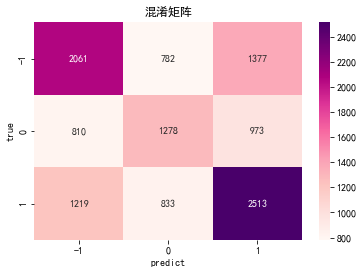

In [57]:
# 模型评估
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(Y,y_predict,labels=[-1,0,1])
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']
# plt.matshow(cfm)
# plt.show()
f,ax = plt.subplots()
sns.heatmap(cfm,annot=True,ax=ax,xticklabels=[-1,0,1],yticklabels=[-1,0,1],fmt="d",cmap="RdPu")
ax.set_title('混淆矩阵')
ax.set_xlabel('predict')
ax.set_ylabel('true')
plt.show()